## Imports

In [1]:
from itertools import groupby

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

## Loading data

In [28]:
df = pd.read_csv('../datasets/Coffee_Sales.csv')

df['date'] = pd.to_datetime(df['date'], format='%Y-%m-%d')
df['datetime'] = pd.to_datetime(df['datetime'], format='%Y-%m-%d %H:%M:%S.%f')
print(df.head())
print(df.info())

        date                datetime cash_type                 card  money  \
0 2024-03-01 2024-03-01 10:15:50.520      card  ANON-0000-0000-0001   38.7   
1 2024-03-01 2024-03-01 12:19:22.539      card  ANON-0000-0000-0002   38.7   
2 2024-03-01 2024-03-01 12:20:18.089      card  ANON-0000-0000-0002   38.7   
3 2024-03-01 2024-03-01 13:46:33.006      card  ANON-0000-0000-0003   28.9   
4 2024-03-01 2024-03-01 13:48:14.626      card  ANON-0000-0000-0004   38.7   

     coffee_name  
0          Latte  
1  Hot Chocolate  
2  Hot Chocolate  
3      Americano  
4          Latte  
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2175 entries, 0 to 2174
Data columns (total 6 columns):
 #   Column       Non-Null Count  Dtype         
---  ------       --------------  -----         
 0   date         2175 non-null   datetime64[ns]
 1   datetime     2175 non-null   datetime64[ns]
 2   cash_type    2175 non-null   object        
 3   card         2086 non-null   object        
 4   money       

In [29]:
print(df.isnull().sum())

print(df.describe())

print(df.dtypes)

date            0
datetime        0
cash_type       0
card           89
money           0
coffee_name     0
dtype: int64
                                date                       datetime  \
count                           2175                           2175   
mean   2024-07-17 12:01:39.310344960  2024-07-18 02:49:14.058442240   
min              2024-03-01 00:00:00     2024-03-01 10:15:50.520000   
25%              2024-05-20 00:00:00  2024-05-20 21:37:25.881499904   
50%              2024-07-30 00:00:00  2024-07-30 07:41:10.944999936   
75%              2024-09-22 00:00:00  2024-09-22 10:12:39.174999808   
max              2024-10-31 00:00:00     2024-10-31 16:00:30.983000   
std                              NaN                            NaN   

             money  
count  2175.000000  
mean     31.725297  
min      18.120000  
25%      27.920000  
50%      32.820000  
75%      35.760000  
max      40.000000  
std       5.161150  
date           datetime64[ns]
datetime       datet

<p> There are 89 anonymous card numbers </p>

## Cash vs card purchasing

#### Number of sales

  cash_type  money
0      card   2086
1      cash     89


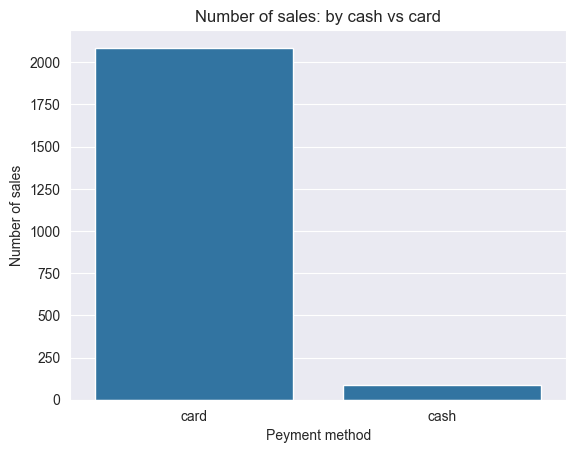

In [19]:
payment_method = df.groupby('cash_type')['money'].count().reset_index()

print(payment_method)

sns.barplot(data=payment_method, x='cash_type', y='money')
plt.title('Number of sales: by cash vs card')
plt.xlabel('Peyment method')
plt.ylabel('Number of sales')
plt.show()

#### Average money spent

  cash_type      money
0      card  31.551544
1      cash  35.797753


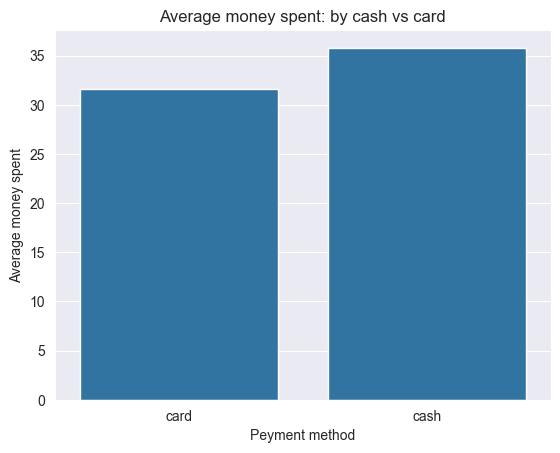

In [20]:
avg_money_spent = df.groupby('cash_type')['money'].mean().reset_index()

print(avg_money_spent)

sns.barplot(data=avg_money_spent, x='cash_type', y='money')
plt.title('Average money spent: by cash vs card')
plt.xlabel('Peyment method')
plt.ylabel('Average money spent')
plt.show()

#### Total money spent

  cash_type     money
0      card  65816.52
1      cash   3186.00


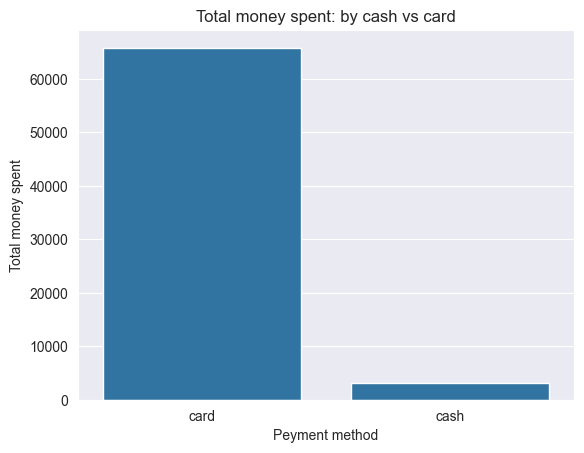

In [21]:
total_money_spent = df.groupby('cash_type')['money'].sum().reset_index()

print(total_money_spent)

sns.barplot(data=total_money_spent, x='cash_type', y='money')
plt.title('Total money spent: by cash vs card')
plt.xlabel('Payment method')
plt.ylabel('Total money spent')
plt.show()

## Purchased product

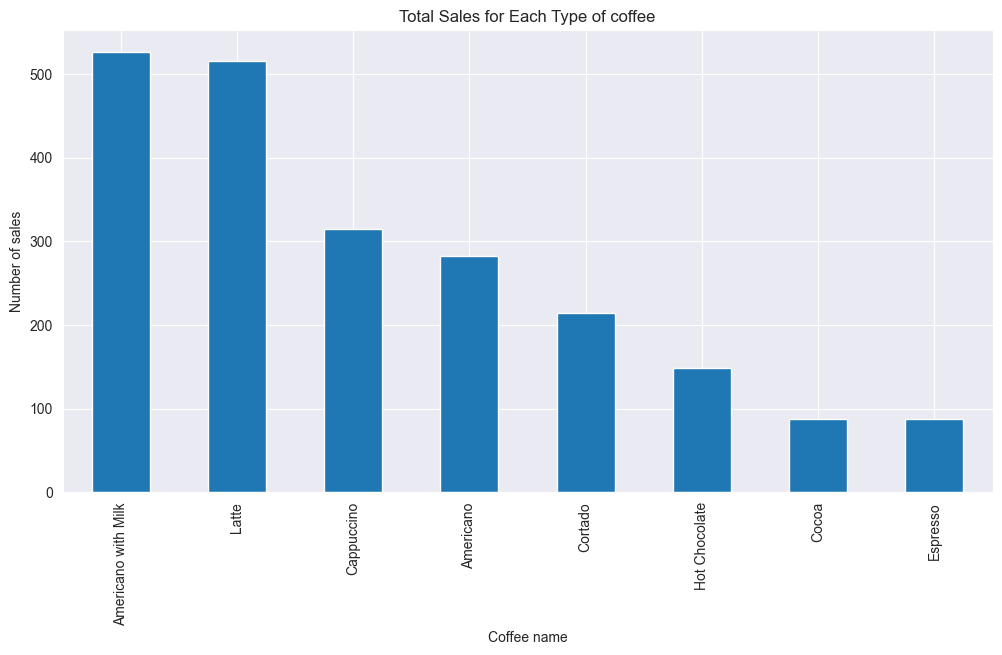

In [39]:
total_sales_by_store = df.groupby('coffee_name')['money'].count().sort_values(ascending=False)

total_sales_by_store.plot(kind='bar', figsize=(12, 6))
plt.title('Total Sales for Each Type of coffee')
plt.xlabel('Coffee name')
plt.ylabel('Number of sales')
plt.show()

## Sales by date

        date     money    Month
0 2024-03-31   7050.20  2024-03
1 2024-04-30   6720.56  2024-04
2 2024-05-31   9063.42  2024-05
3 2024-06-30   7758.76  2024-06
4 2024-07-31   6915.94  2024-07
5 2024-08-31   7613.84  2024-08
6 2024-09-30   9988.64  2024-09
7 2024-10-31  13891.16  2024-10


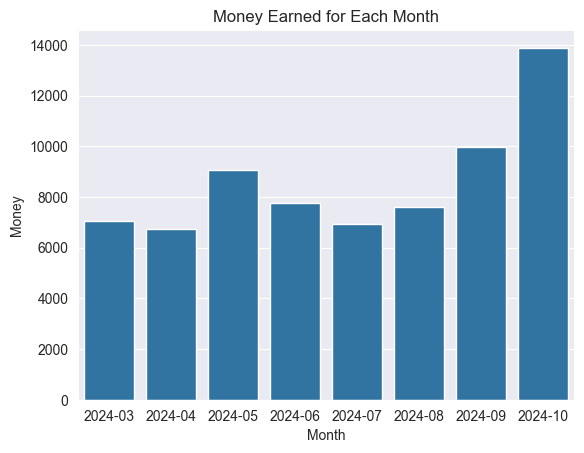

In [45]:
monthly_sales = df.resample('ME', on='date')['money'].sum().reset_index()

monthly_sales['Month'] = monthly_sales['date'].dt.strftime('%Y-%m')

print(monthly_sales)

sns.barplot(data=monthly_sales, x='Month', y='money')
plt.title('Money Earned for Each Month')
plt.xlabel('Month')
plt.ylabel('Money')
plt.show()

#### Number of sales by hour

                datetime  money  Hour
0    2024-03-01 10:00:00      1    10
1    2024-03-01 11:00:00      0    11
2    2024-03-01 12:00:00      2    12
3    2024-03-01 13:00:00      2    13
4    2024-03-01 14:00:00      0    14
...                  ...    ...   ...
5858 2024-10-31 12:00:00      0    12
5859 2024-10-31 13:00:00      0    13
5860 2024-10-31 14:00:00      0    14
5861 2024-10-31 15:00:00      1    15
5862 2024-10-31 16:00:00      1    16

[5863 rows x 3 columns]
    Hour  money
7      7     43
8      8    148
9      9    141
10    10    221
11    11    189
12    12    162
13    13    136
14    14    128
15    15    122
16    16    130
17    17    125
18    18    128
19    19    148
20    20    118
21    21    155
22    22     81


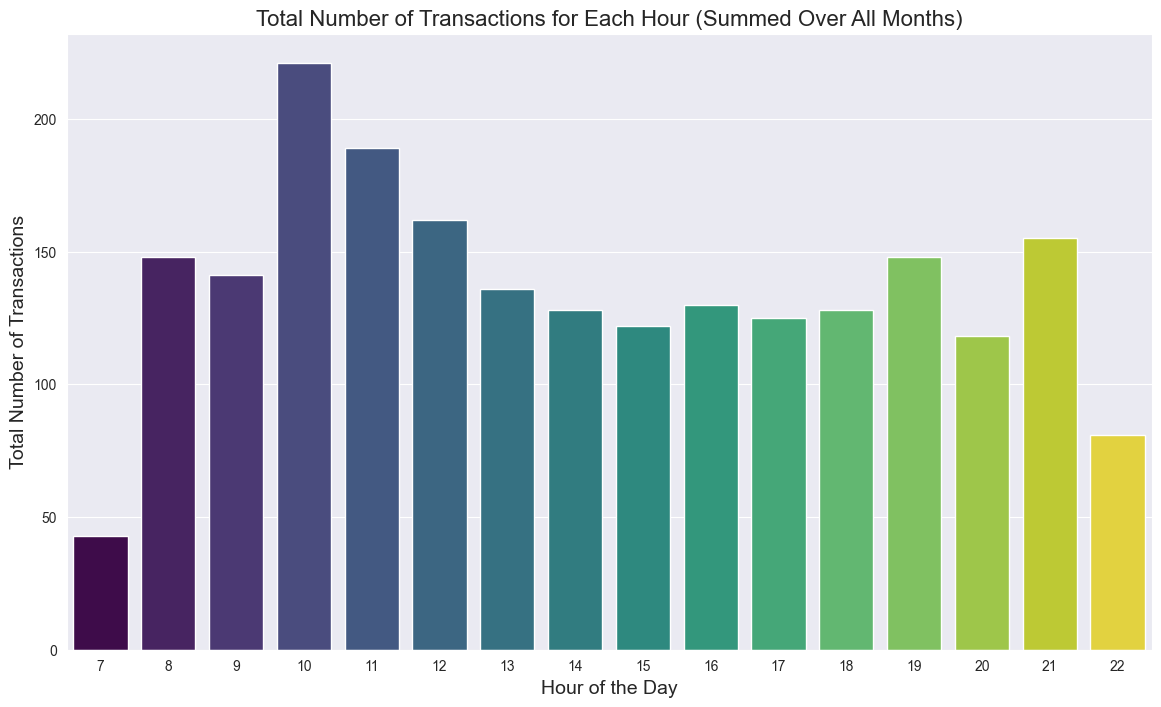

In [79]:
hourly_sales = df.resample('h', on='datetime')['money'].count().reset_index()

hourly_sales['Hour'] = hourly_sales['datetime'].dt.hour

hourly_sales_sum = hourly_sales.groupby('Hour')['money'].sum().reset_index()

print(hourly_sales)

hourly_sales_sum = hourly_sales_sum[(hourly_sales_sum['Hour'] > 6) & (hourly_sales_sum['Hour'] < 23)]

print(hourly_sales_sum)

plt.figure(figsize=(14, 8))
sns.barplot(data=hourly_sales_sum, x='Hour', y='money', hue='Hour', palette='viridis', legend=False)

plt.title('Total Number of Transactions for Each Hour (Summed Over All Months)', fontsize=16)
plt.xlabel('Hour of the Day', fontsize=14)
plt.ylabel('Total Number of Transactions', fontsize=14)

plt.show()


## Returning customers

In [93]:
visit_count = df.groupby('card')['date'].count().reset_index()
returning_customers = visit_count[(visit_count['date'] > 1)]
print(returning_customers)
print(returning_customers.count())

                    card  date
0    ANON-0000-0000-0001    17
1    ANON-0000-0000-0002     2
2    ANON-0000-0000-0003    31
3    ANON-0000-0000-0004    12
7    ANON-0000-0000-0008     2
..                   ...   ...
823  ANON-0000-0000-0824     2
827  ANON-0000-0000-0828     2
830  ANON-0000-0000-0831     2
834  ANON-0000-0000-0835     2
837  ANON-0000-0000-0838     2

[339 rows x 2 columns]
card    339
date    339
dtype: int64
